In [0]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [0]:
#! unzip "drive/My Drive/Colab Notebooks/cell_images.zip"

In [0]:
# Importing packages

import tensorflow.keras,os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Train and test data

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="cell_images/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="cell_images/test", target_size=(224,224))

Found 22046 images belonging to 2 classes.
Found 5502 images belonging to 2 classes.


In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential

def preprocess_input_vgg(x):
    """Wrapper around keras.applications.vgg16.preprocess_input()
    to make it compatible for use with keras.preprocessing.image.ImageDataGenerator's
    `preprocessing_function` argument.
    
    Parameters
    ----------
    x : a numpy 3darray (a single image to be preprocessed)
    
    Note we cannot pass keras.applications.vgg16.preprocess_input()
    directly to to keras.preprocessing.image.ImageDataGenerator's
    `preprocessing_function` argument because the former expects a
    4D tensor whereas the latter expects a 3D tensor. Hence the
    existence of this wrapper.
    
    Returns a numpy 3darray (the preprocessed image).
    
    """
    X = np.expand_dims(x, axis=0)
    X = preprocess_input(X)
    return X[0]

# Transfer learning
#loading the pre-trained model
vgg16 = VGG16(weights='imagenet') 

# vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=None)

vgg16.summary()
# select all layers before last one
x  = vgg16.get_layer('fc2').output

#class by two (cat, dog)
prediction = Dense(2, activation='softmax', name='predictions')(x)

# compile
model = Model(inputs=vgg16.input, outputs=prediction)
model.summary()
# find tuning the model. Make all layers untrainable
for layer in model.layers:
    layer.trainable = False

# makes the layers from the last trainable
for layer in model.layers[-6:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# compile the model

from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=tensorflow.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [16]:
# Train the model

from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

Using TensorFlow backend.


In [17]:
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=5,callbacks=[checkpoint,early])

Epoch 1/5
10/10 [==============================] - 166s 17s/step - loss: 1.2109 - acc: 0.4750

Epoch 00001: val_acc improved from -inf to 0.47500, saving model to vgg16_1.h5
10/10 [==============================] - 359s 36s/step - loss: 66.0115 - acc: 0.4812 - val_loss: 1.2109 - val_acc: 0.4750
Epoch 2/5
10/10 [==============================] - 166s 17s/step - loss: 0.2753 - acc: 0.8875

Epoch 00002: val_acc improved from 0.47500 to 0.88750, saving model to vgg16_1.h5
10/10 [==============================] - 354s 35s/step - loss: 0.5881 - acc: 0.7125 - val_loss: 0.2753 - val_acc: 0.8875
Epoch 3/5
10/10 [==============================] - 166s 17s/step - loss: 0.3077 - acc: 0.9031

Epoch 00003: val_acc improved from 0.88750 to 0.90312, saving model to vgg16_1.h5
10/10 [==============================] - 355s 36s/step - loss: 0.2935 - acc: 0.9062 - val_loss: 0.3077 - val_acc: 0.9031
Epoch 4/5
10/10 [==============================] - 165s 17s/step - loss: 0.2989 - acc: 0.8844

Epoch 00004: 

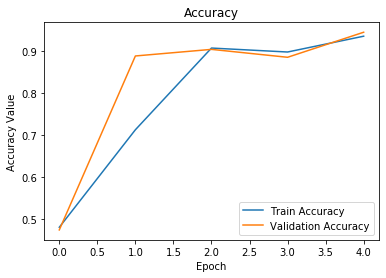

In [25]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title("Accuracy")
plt.ylabel("Accuracy Value")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [0]:
model.save('drive/My Drive/Colab Notebooks/malaria_transfer_cnn.h5')

In [20]:
from tensorflow.keras.preprocessing import image

img = image.load_img("cell_images/live_cells/Detect/C201ThinF_IMG_20150930_143502_cell_68.png",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from tensorflow.keras.models import load_model
saved_model = load_model("drive/My Drive/Colab Notebooks/malaria_transfer_cnn.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Parasitized")
else:
    print('Uninfected')

FileNotFoundError: ignored